In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import myFunctions as mf
import importlib
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from dateutil import parser
import datetime

In [91]:
importlib.reload(mf)

<module 'myFunctions' from '/home/jovyan/BasketballPlayoffs/myFunctions.py'>

In [92]:
plyrs = pickle.load(open( "allplayers.p", "rb" ))
plyrsreg = pickle.load(open("allplayersregular.p","rb"))
allshotspoff = pickle.load(open( "allshotspoff2017.p", "rb" ))
allshotsreg = pickle.load(open("allshotsreg2017.p","rb"))
PIDS = [i for i in plyrs.keys()]

In [4]:
allshotsreg

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,PlayerID
0,Shot Chart Detail,0021800002,177,203518,Alex Abrines,1610612760,Oklahoma City Thunder,1,0,41,...,Less Than 8 ft.,2,11,21,1,1,20181016,GSW,OKC,203518
1,Shot Chart Detail,0021800002,254,203518,Alex Abrines,1610612760,Oklahoma City Thunder,2,7,38,...,24+ ft.,25,-200,164,1,0,20181016,GSW,OKC,203518
2,Shot Chart Detail,0021800002,366,203518,Alex Abrines,1610612760,Oklahoma City Thunder,2,1,21,...,24+ ft.,26,-112,237,1,1,20181016,GSW,OKC,203518
3,Shot Chart Detail,0021800002,372,203518,Alex Abrines,1610612760,Oklahoma City Thunder,2,0,52,...,24+ ft.,26,92,245,1,0,20181016,GSW,OKC,203518
4,Shot Chart Detail,0021800002,383,203518,Alex Abrines,1610612760,Oklahoma City Thunder,2,0,4,...,8-16 ft.,14,90,111,1,0,20181016,GSW,OKC,203518
5,Shot Chart Detail,0021800002,535,203518,Alex Abrines,1610612760,Oklahoma City Thunder,3,1,21,...,24+ ft.,25,-226,110,1,0,20181016,GSW,OKC,203518
6,Shot Chart Detail,0021800002,553,203518,Alex Abrines,1610612760,Oklahoma City Thunder,3,0,24,...,24+ ft.,26,154,217,1,1,20181016,GSW,OKC,203518
7,Shot Chart Detail,0021800002,597,203518,Alex Abrines,1610612760,Oklahoma City Thunder,4,9,49,...,24+ ft.,22,-226,32,1,0,20181016,GSW,OKC,203518
8,Shot Chart Detail,0021800025,122,203518,Alex Abrines,1610612760,Oklahoma City Thunder,1,2,39,...,Less Than 8 ft.,2,-19,23,1,1,20181019,LAC,OKC,203518
9,Shot Chart Detail,0021800025,141,203518,Alex Abrines,1610612760,Oklahoma City Thunder,1,1,48,...,24+ ft.,24,143,204,1,1,20181019,LAC,OKC,203518


In [93]:
aggregation = {'SHOT_ATTEMPTED_FLAG': {'TOTAL_SHOTS': 'sum'}}

playOffTeams = allshotspoff.TEAM_NAME.unique()
playOffNames = allshotspoff.PLAYER_NAME.unique()
teamTotalReg = allshotsreg[allshotsreg.TEAM_NAME.isin(playOffTeams)].groupby(['GAME_ID','TEAM_NAME']).agg(aggregation)
teamTotalPoff = allshotspoff.groupby(['GAME_ID','TEAM_NAME']).agg(aggregation)
teamTotalReg.columns = teamTotalReg.columns.droplevel(0)

teamTotalPoff.columns = teamTotalPoff.columns.droplevel(0)
teamTotalReg

/opt/conda/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


TOTAL_SHOTS
GAME_ID    TEAM_NAME                          
0021800001 Boston Celtics                   96
           Philadelphia 76ers               83
0021800002 Golden State Warriors            95
           Oklahoma City Thunder            87
0021800003 Milwaukee Bucks                  78
0021800004 Brooklyn Nets                    80
           Detroit Pistons                  88
0021800005 Indiana Pacers                   81
0021800006 Orlando Magic                    86
0021800008 Toronto Raptors                  92
0021800009 Houston Rockets                  92
0021800010 San Antonio Spurs                93
0021800011 Utah Jazz                        79
0021800012 Denver Nuggets                   87
           LA Clippers                      82
0021800014 Philadelphia 76ers               85
0021800016 Portland Trail Blazers          100
0021800017 Orlando Magic                    85
0021800018 Brooklyn Nets                    67
0021800019 Boston Celtics                   99
           Toronto Raptors                  92
0021800023 Indiana Pacers                   83
           Milwaukee Bucks                  87
0021800024 Golden State Warriors            87
           Utah Jazz                        89
0021800025 LA Clippers                      79
           Oklahoma City Thunder            94
0021800026 Brooklyn Nets                    71
           Indiana Pacers                   91
0021800027 Toronto Raptors                  88
...                                        ...
0021801203 Boston Celtics                   86
           Orlando Magic                    90
0021801205 Golden State Warriors            96
           LA Clippers                      55
0021801206 Denver Nuggets                   94
           Portland Trail Blazers           89
0021801208 Utah Jazz                        79
0021801210 Detroit Pistons                  83
0021801211 Boston Celtics                   83
0021801212 Philadelphia 76ers               75
0021801214 Toronto Raptors                  74
0021801215 Golden State Warriors            75
0021801217 Denver Nuggets                   87
           Utah Jazz                        76
0021801218 Houston Rockets                  88
           Oklahoma City Thunder            96
0021801219 Portland Trail Blazers           90
0021801220 Indiana Pacers                   82
0021801221 Brooklyn Nets                    90
0021801222 Orlando Magic                    88
0021801223 Detroit Pistons                  79
0021801224 Philadelphia 76ers               68
0021801225 Golden State Warriors            79
0021801226 Milwaukee Bucks                  84
           Oklahoma City Thunder            99
0021801227 San Antonio Spurs                85
0021801228 Denver Nuggets                   87
0021801229 LA Clippers                      82
           Utah Jazz                        67
0021801230 Portland Trail Blazers           51

[1312 rows x 1 columns]

In [94]:
plyrsTotalReg = allshotsreg[np.logical_and(allshotsreg.TEAM_NAME.isin(playOffTeams),allshotsreg.PLAYER_NAME.isin(playOffNames))].groupby(['GAME_ID','TEAM_NAME','PLAYER_NAME']).agg(aggregation)
plyrsTotalPoff = allshotspoff.groupby(['GAME_ID','TEAM_NAME','PLAYER_NAME']).agg(aggregation)
plyrsTotalReg



plyrsTotalReg['TEAM_TOTAL_SHOTS'] = teamTotalReg.TOTAL_SHOTS
plyrsTotalReg['PCT_SHOTS'] = plyrsTotalReg.SHOT_ATTEMPTED_FLAG.TOTAL_SHOTS.values / plyrsTotalReg.TEAM_TOTAL_SHOTS.values

plyrsTotalReg


SHOT_ATTEMPTED_FLAG  \
                                                           TOTAL_SHOTS   
GAME_ID    TEAM_NAME              PLAYER_NAME                            
0021800001 Boston Celtics         Al Horford                         7   
                                  Aron Baynes                        7   
                                  Gordon Hayward                    12   
                                  Jaylen Brown                      13   
                                  Jayson Tatum                      17   
                                  Kyrie Irving                      14   
                                  Marcus Morris                     12   
                                  Marcus Smart                       4   
                                  Terry Rozier                      10   
           Philadelphia 76ers     Amir Johnson                       1   
                                  Ben Simmons                       14   
                                  JJ Redick                         17   
                                  Joel Embiid                       21   
                                  T.J. McConnell                     5   
0021800002 Golden State Warriors  Alfonzo McKinnie                   1   
                                  Andre Iguodala                     2   
                                  Damian Jones                       7   
                                  Draymond Green                     6   
                                  Kevin Durant                      21   
                                  Kevon Looney                      11   
                                  Klay Thompson                     20   
                                  Quinn Cook                         2   
                                  Shaun Livingston                   5   
                                  Stephen Curry                     20   
           Oklahoma City Thunder  Dennis Schroder                   19   
                                  Jerami Grant                       7   
                                  Nerlens Noel                       2   
                                  Paul George                       23   
                                  Raymond Felton                     5   
                                  Steven Adams                      12   
...                                                                ...   
0021801227 San Antonio Spurs      Patty Mills                        5   
                                  Rudy Gay                          10   
0021801228 Denver Nuggets         Gary Harris                       11   
                                  Jamal Murray                      12   
                                  Malik Beasley                     10   
                                  Mason Plumlee                      2   
                                  Monte Morris                       8   
                                  Nikola Jokic                      26   
                                  Paul Millsap                       7   
                                  Torrey Craig                       1   
                                  Will Barton                       10   
0021801229 LA Clippers            Danilo Gallinari                  11   
                                  Garrett Temple                     4   
                                  Ivica Zubac                       13   
                                  JaMychal Green                     9   
                                  Lou Williams                      17   
                                  Montrezl Harrell                  13   
                                  Patrick Beverley                   9   
                                  Tyrone Wallace                     3   
                                  Wilson Chandler                    3   
           Utah Jazz              Ekpe Udoh            

In [100]:
plyrsTotalPoff['TEAM_TOTAL_SHOTS'] = teamTotalPoff.TOTAL_SHOTS
plyrsTotalPoff['PCT_SHOTS'] = plyrsTotalPoff.SHOT_ATTEMPTED_FLAG.TOTAL_SHOTS.values / plyrsTotalPoff.TEAM_TOTAL_SHOTS.values

plyrsTotalPoff

SHOT_ATTEMPTED_FLAG  \
                                                               TOTAL_SHOTS   
GAME_ID    TEAM_NAME             PLAYER_NAME                                 
0041800101 Detroit Pistons       Andre Drummond                          9   
                                 Glenn Robinson III                      5   
                                 Ish Smith                               6   
                                 Jon Leuer                               2   
                                 Langston Galloway                       8   
                                 Luke Kennard                           14   
                                 Reggie Jackson                         14   
                                 Thon Maker                             10   
                                 Wayne Ellington                        10   
                                 Zaza Pachulia                           6   
           Milwaukee Bucks       Brook Lopez                             7   
                                 D.J. Wilson                             5   
                                 Eric Bledsoe                            9   
                                 Ersan Ilyasova                          4   
                                 George Hill                            11   
                                 Giannis Antetokounmpo                  17   
                                 Khris Middleton                        13   
                                 Nikola Mirotic                          8   
                                 Pat Connaughton                         6   
                                 Sterling Brown                          5   
                                 Tim Frazier                             5   
0041800102 Detroit Pistons       Andre Drummond                         15   
                                 Glenn Robinson III                     10   
                                 Ish Smith                              13   
                                 Langston Galloway                       7   
                                 Luke Kennard                           13   
                                 Reggie Jackson                         16   
                                 Thon Maker                              9   
                                 Wayne Ellington                        10   
           Milwaukee Bucks       Brook Lopez                             8   
...                                                                    ...   
0041800403 Golden State Warriors Draymond Green                         14   
                                 Jonas Jerebko                           6   
                                 Jordan Bell                             1   
                                 Quinn Cook                              9   
                                 Shaun Livingston                        4   
                                 Stephen Curry                          31   
           Toronto Raptors       Danny Green                            10   
                                 Fred VanVleet                           8   
                                 Kawhi Leonard                          17   
                                 Kyle Lowry                             16   
                                 Marc Gasol                             11   
                                 Pascal Siakam                          16   
                                 Serge Ibaka                             4   
0041800404 Golden State Warriors Alfonzo McKinnie                        4   
                                 Andre Iguodala                          6   
                                 DeMarcus Cousins                        6   
                                 Draymond Green                          6   
                                 Kevon Looney                            8   

In [101]:
##
meanPctReg = plyrsTotalReg.groupby('PLAYER_NAME').mean()
meanPctPoff = plyrsTotalPoff.groupby('PLAYER_NAME').mean()
sumTable = meanPctReg
sumTable['PCT_SHOTS_POFF'] = meanPctPoff.PCT_SHOTS.values
sumTable['PCT_DIFF'] = (meanPctReg.PCT_SHOTS.values - meanPctPoff.PCT_SHOTS.values)


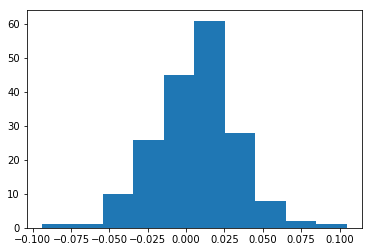

In [103]:
bins = plt.hist(sumTable.PCT_DIFF, bins = 10)

In [10]:
def inBin(value, bins):
    if(value > bins[len(bins)-1]):
        return(bins[len(bins)-1])
    for i in range(len(bins)):
        if(value >= bins[i] and value <= bins[i+1]):
            return i

In [11]:
print(bins[1])
sumTable["BIN"] = [inBin(value = i,bins = bins[1]) for i in sumTable.PCT_DIFF]


[-0.09381964 -0.08059519 -0.06737074 -0.0541463  -0.04092185 -0.0276974
 -0.01447296 -0.00124851  0.01197594  0.02520038  0.03842483  0.05164928
  0.06487372  0.07809817  0.09132262  0.10454706]


In [12]:
print(sumTable[sumTable.BIN == 4])

                   SHOT_ATTEMPTED_FLAG TEAM_TOTAL_SHOTS PCT_SHOTS  \
                           TOTAL_SHOTS                              
PLAYER_NAME                                                         
Andre Iguodala                4.646154        88.753846  0.051833   
Bojan Bogdanovic             12.975309        83.641975  0.155997   
Darren Collison               8.671053        83.763158  0.103959   
Derrick White                 8.353846        85.815385  0.097814   
Donovan Mitchell             19.870130        84.506494  0.234619   
Glenn Robinson III            4.190476        85.142857  0.048386   
Kawhi Leonard                18.816667        87.683333  0.214079   
Kyrie Irving                 18.522388        89.671642  0.204930   
Luke Kennard                  8.253968        82.000000  0.101660   
Nikola Jokic                 15.075000        89.137500  0.169010   
Patrick Beverley              6.115385        75.628205  0.081211   
Tyreke Evans                  9.56

In [13]:
print(sumTable[np.logical_or(sumTable.BIN == 7,sumTable.BIN == 8)])

                        SHOT_ATTEMPTED_FLAG TEAM_TOTAL_SHOTS PCT_SHOTS  \
                                TOTAL_SHOTS                              
PLAYER_NAME                                                              
Aaron Gordon                      13.410256        84.230769  0.159684   
Al-Farouq Aminu                    7.320988        89.666667  0.081935   
Alfonzo McKinnie                   4.166667        88.030303  0.047348   
Amir Johnson                       3.413043        79.934783  0.043042   
Andre Drummond                    13.316456        83.886076  0.157957   
Austin Rivers                      8.042553        86.191489  0.093577   
Blake Griffin                     17.880000        83.853333  0.213848   
Boban Marjanovic                   5.000000        80.230769  0.062808   
Brook Lopez                        9.703704        88.765432  0.109341   
Bryn Forbes                        9.646341        86.024390  0.112463   
Cory Joseph                        6.6

In [14]:
sumTable[np.logical_or(np.logical_or(sumTable.BIN == 7,sumTable.BIN == 8),sumTable.BIN == 9)].index.values

array(['Aaron Gordon', 'Abdel Nader', 'Al-Farouq Aminu',
       'Alfonzo McKinnie', 'Amir Johnson', 'Andre Drummond',
       'Aron Baynes', 'Austin Rivers', 'Blake Griffin',
       'Boban Marjanovic', 'Brook Lopez', 'Bryn Forbes', 'Cory Joseph',
       'D.J. Augustin', 'D.J. Wilson', 'Damian Jones', 'Daniel Theis',
       'Danny Green', 'Dante Cunningham', 'Danuel House Jr.',
       'Davis Bertans', 'DeMarre Carroll', 'Dennis Schroder',
       'Derrick Favors', 'Domantas Sabonis', 'Doug McDermott', 'Ed Davis',
       'Ekpe Udoh', 'Enes Kanter', 'Eric Bledsoe', 'Eric Moreland',
       'Ersan Ilyasova', 'Evan Turner', 'Fred VanVleet', 'Furkan Korkmaz',
       'Garrett Temple', 'Gary Harris', 'Gordon Hayward', 'Greg Monroe',
       'Guerschon Yabusele', 'Iman Shumpert', 'Ish Smith',
       'JaMychal Green', 'Jae Crowder', 'James Harden', 'Jared Dudley',
       'Jarrett Allen', 'Jaylen Brown', 'Jerami Grant', 'Jerian Grant',
       'Jodie Meeks', 'Joe Harris', 'Joe Ingles', 'Jon Leuer',
  

In [18]:
plyrInfo = pickle.load(open('plyrinfo2017.p','rb'))

In [36]:
plyrInfoPoff = plyrinfo[plyrinfo.DISPLAY_FIRST_LAST.isin(playOffNames)]

In [77]:
def ft2inches(value):
    if(value == ''):
        return np.NaN
    valuelist = value.split("-")
    return int(valuelist[0])*12+int(valuelist[1])
def yr2age(value):
    now = datetime.datetime.now()
    return(now.year - parser.parse(value).year)

In [84]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from dateutil import parser
import datetime

X = pd.DataFrame(plyrInfoPoff[["HEIGHT","WEIGHT"]])
X["AGE"] = [yr2age(i) for i in plyrinfoPoff.BIRTHDATE]
Y = X.copy()
Y["PLAYER_NAME"]= plyrInfoPoff.DISPLAY_FIRST_LAST
for i in range(len(Y.WEIGHT)):
    if Y.WEIGHT.iloc[i] == '':
        print(Y.PLAYER_NAME.iloc[i])
        print(i)
    if Y.AGE.iloc[i] == '':
        print("AGE MISSING", Y.PLAYER_NAME.iloc[i],i)
X.WEIGHT.iloc[43] = 220
X.HEIGHT.iloc[43] = "6-6"
X.HEIGHT = [ft2inches(i) for i in X.HEIGHT]
X.WEIGHT = [int(i) for i in X.WEIGHT]

Tyreke Evans
43
HEIGHT     78
WEIGHT    220
AGE        30
Name: 143, dtype: int64


In [109]:
clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'complete').fit(X)
clustering.labels_

ValueError: Expected 2D array, got 1D array instead:
array=[26 34 21 29 25 32 28 33 23 33 24 27 31 27 30 30 27 23 24 30 25 33 28 32
 22 32 26 26 29 29 29 32 29 31 30 30 26 26 34 31 32 25 29 30 30 28 35 21
 26 27 29 31 28 34 33 29 27 24 31 26 25 27 32 29 33 29 30 30 26 25 25 28
 27 29 24 37 33 24 27 33 26 30 35 32 32 27 22 25 29 32 32 24 24 28 27 23
 22 38 23 25 25 22 28 27 30 29 31 34 23 31 33 24 22 31 25 33 24 28 27 27
 27 32 28 26 31 34 28 23 29 28 30 30 24 22 26 28 27 26 25 26 25 35 34 29
 24 26 35 27 25 28 25 29 23 23 26 31 35 29 25 23 30 25 31 28 21 33 27 29
 25 34 31 23 32 25 29 25 31 25 33 23 24 31 22].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [87]:
Y = X.copy()
Y["PLAYER_NAME"] = plyrInfoPoff.DISPLAY_FIRST_LAST
Y["CLUSTER"] = clustering.labels_
print(Y)

     HEIGHT  WEIGHT  AGE              PLAYER_NAME  CLUSTER
2        84     265   26             Steven Adams        0
7        83     260   34        LaMarcus Aldridge        0
8        83     237   21            Jarrett Allen        1
10       81     220   29          Al-Farouq Aminu        1
15       83     242   25    Giannis Antetokounmpo        1
23       72     183   32            D.J. Augustin        2
31       78     190   28              Will Barton        2
34       82     260   33              Aron Baynes        0
37       77     195   23            Malik Beasley        2
39       77     210   33          Marco Belinelli        1
40       81     224   24              Jordan Bell        1
43       82     225   27            Davis Bertans        1
44       73     185   31         Patrick Beverley        2
45       81     233   27               Khem Birch        1
51       73     205   30             Eric Bledsoe        1
53       80     216   30         Bojan Bogdanovic       

In [107]:
print(Y[Y.CLUSTER == 2])

     HEIGHT  WEIGHT  AGE              PLAYER_NAME  CLUSTER
23       72     183   32            D.J. Augustin        2
31       78     190   28              Will Barton        2
37       77     195   23            Malik Beasley        2
44       73     185   31         Patrick Beverley        2
80       78     190   28  Michael Carter-Williams        2
94       72     175   32          Darren Collison        2
98       74     179   26               Quinn Cook        2
110      74     185   29               Seth Curry        2
111      75     190   31            Stephen Curry        2
137      77     200   32          Wayne Ellington        2
150      79     190   21        Terrance Ferguson        2
153      75     190   26              Bryn Forbes        2
156      73     170   29              Tim Frazier        2
160      74     200   28        Langston Galloway        2
208      75     188   33              George Hill        2
227      75     193   27             Kyrie Irving       